In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [59]:
filename= "/Users/laure/OneDrive/Dokumente/VU/Python for Text Analysis/Final Assignment/irony-labeled.csv"

df = pd.read_csv(filename)
df.head()

#Renaming the columns
df.columns = ["Comment_Text", "Label"]

In [60]:
#checking for any missing values
missing_data = df.isnull().sum()
missing_data

Comment_Text    0
Label           0
dtype: int64

In [61]:
from sklearn.model_selection import train_test_split

In [89]:
y = df["Comment_Text"]
x = df["Label"]

#think this is the right way round.... !! 
#i.e. x = label, y = comment, but we may need to check haha

##double check and see top 5
# print(x.head())
# print(y.head())

In [90]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
val = pd.concat([X_val, y_val], axis=1)

print(len(train)) #70
print(len(test))  #20
print(len(val))   #10



1364
390
195


In [82]:
##Indexing Training
# print("Comment_label:", train["Comment_Text"].iloc[:4])
# print("Label:", train["Label"].iloc[:4])

In [83]:
# pandas .shape to see data frame in form of tuples (no. of rows / cols)

print("Training Data Shape:", train.shape)
print("Testing Data Shape:", test.shape)
print("Validation Data Shape:", val.shape)

Training Data Shape: (1364, 2)
Testing Data Shape: (390, 2)
Validation Data Shape: (195, 2)


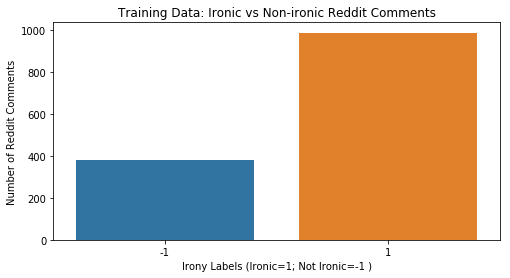

In [84]:
#Summarise the distribution of comments by different labels (1)Train, (2)Val (3)Test

#TRAINING
fig = plt.figure(figsize=(8,4))
sns.barplot(x = train["Label"].unique(), 
            y=train["Label"].value_counts())

plt.title("Training Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Ironic=1; Not Ironic=-1 )")
plt.show()

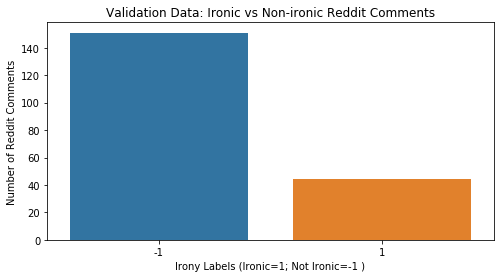

In [85]:
#VALIDATION
fig = plt.figure(figsize=(8,4))
sns.barplot(x = val["Label"].unique(), 
            y=val["Label"].value_counts())

plt.title("Validation Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Ironic=1; Not Ironic=-1 )")
plt.show()

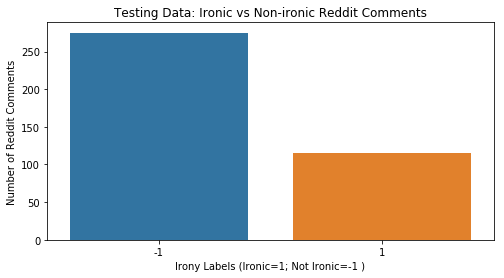

In [86]:
#TESTING
fig = plt.figure(figsize=(8,4))
sns.barplot(x = test["Label"].unique(), 
            y=test["Label"].value_counts())

plt.title("Testing Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Ironic=1; Not Ironic=-1 )")
plt.show()

In [69]:
import spacy

nlp = spacy.load("en_core_web_sm")
punct = string.punctuation

for x in df:
    doc = nlp(x)
